In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data
#this data was dowloaded from kaggle.com

customers = pd.read_csv(r'dataset.csv')

In [3]:
#data head 
customers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#list of columns now available in the dataset
columns = customers.columns.values.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [5]:
# Let's remove columns that are unsignificant to our model. 
newcustomers = customers.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [6]:
newcustomers = newcustomers.drop(['Geography', 'Gender'], axis=1)

In [7]:
Geography = pd.get_dummies(customers.Geography).iloc[:,1:]

Gender = pd.get_dummies(customers.Gender).iloc[:,1:]

In [8]:
newcustomers = pd.concat([newcustomers,Geography,Gender],axis = 1)

In [9]:
newcustomers.head(20)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [10]:
#Target Variable 

X = newcustomers.drop(['Exited'], axis=1)

y = newcustomers['Exited']

In [11]:
#excluding variables that have high correlation 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
vif = pd.DataFrame()
vif[ 'VIF' ] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['Variable'] = X.columns

In [13]:
vif

,VIF,Variable
0,21.236445,CreditScore
1,12.334128,Age
2,3.872755,Tenure
3,3.182267,Balance
4,7.826417,NumOfProducts
5,3.289605,HasCrCard
6,2.075966,IsActiveMember
7,3.887186,EstimatedSalary
8,1.787170,Germany
9,1.486247,Spain


In [14]:
import seaborn as sns

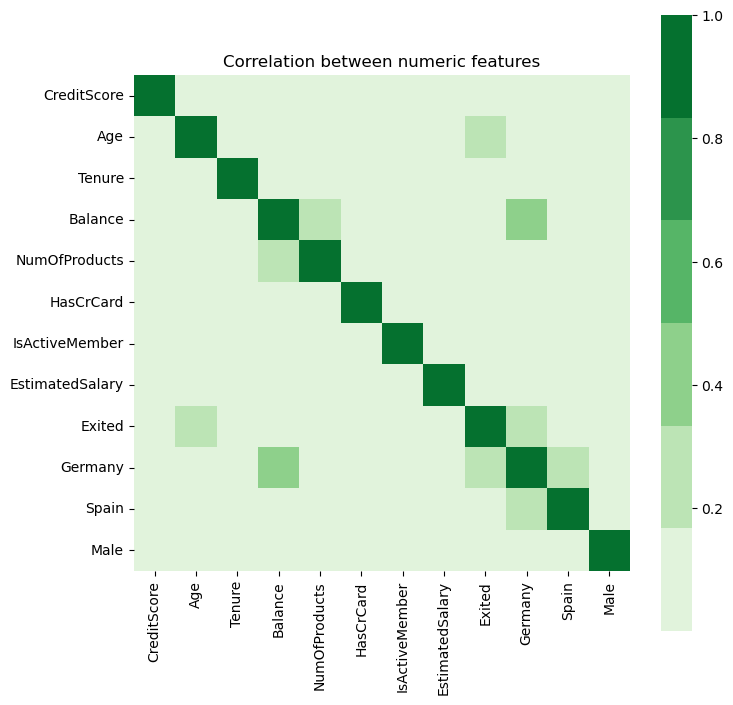

In [15]:
numeric_cols = newcustomers.columns[newcustomers.dtypes != 'object']
numeric_df = pd.DataFrame(data = newcustomers, columns = numeric_cols,index = newcustomers.index)

corr = np.abs(numeric_df.corr())
fig , ax = plt.subplots(figsize = (8,8))
cmap = sns.color_palette("Greens")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numeric features')
plt.show()

In [16]:
#Data Split into Training and Test Data Set
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [18]:
#ML training
from sklearn.ensemble import RandomForestClassifier

In [19]:
classifier = RandomForestClassifier(n_estimators = 200, random_state = 0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [20]:
#Evaluation 
from sklearn.metrics import classification_report, accuracy_score

In [21]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


In [22]:
#XGBoost Training
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.67      0.53      0.59       405

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000

0.8525


<AxesSubplot:>

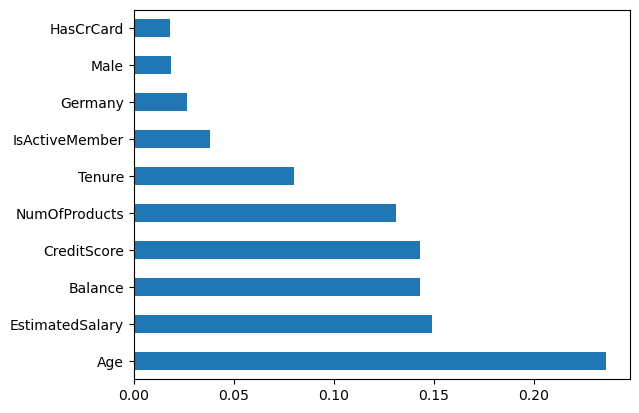

In [25]:
#Feature importance

feature_imp = pd.Series(classifier.feature_importances_, index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')